# Car Price Prediction using Linear Regression

# importing Libraries and Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv")

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


# Information about the Entire data

In [4]:
df.info

<bound method DataFrame.info of                                      name  year  selling_price  km_driven  \
0                           Maruti 800 AC  2007          60000      70000   
1                Maruti Wagon R LXI Minor  2007         135000      50000   
2                    Hyundai Verna 1.6 SX  2012         600000     100000   
3                  Datsun RediGO T Option  2017         250000      46000   
4                   Honda Amaze VX i-DTEC  2014         450000     141000   
...                                   ...   ...            ...        ...   
4335  Hyundai i20 Magna 1.4 CRDi (Diesel)  2014         409999      80000   
4336           Hyundai i20 Magna 1.4 CRDi  2014         409999      80000   
4337                  Maruti 800 AC BSIII  2009         110000      83000   
4338     Hyundai Creta 1.6 CRDi SX Option  2016         865000      90000   
4339                     Renault KWID RXT  2016         225000      40000   

        fuel seller_type transmission      

In [5]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [6]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [7]:
print(df["fuel"].value_counts())

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64


In [8]:
print(df["transmission"].value_counts())
print(df["seller_type"].value_counts())


Manual       3892
Automatic     448
Name: transmission, dtype: int64
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64


In [9]:
fuel=df["fuel"]
seller_type=df["seller_type"]
transmission=df["transmission"]
selling_price=df["selling_price"]

<AxesSubplot:xlabel='transmission', ylabel='selling_price'>

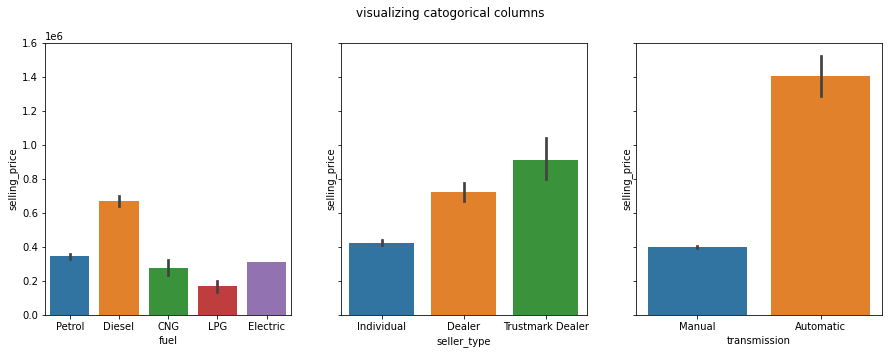

In [10]:
fig,axes=plt.subplots(1,3,figsize=(15,5),sharey=True)
fig.suptitle("visualizing catogorical columns")
sns.barplot(x=fuel,y=selling_price,ax=axes[0])
sns.barplot(x=seller_type,y=selling_price,ax=axes[1])
sns.barplot(x=transmission,y=selling_price,ax=axes[2])

# Label Encoder

Label Encoder is used to convert the catagorical data into the numerical data

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
lb=LabelEncoder()

In [13]:
df["fuel"]=lb.fit_transform(df["fuel"])
df["selling_price"]=lb.fit_transform(df["selling_price"])
df["seller_type"]=lb.fit_transform(df["seller_type"])
df["transmission"]=lb.fit_transform(df["transmission"])

In [14]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,17,70000,4,1,1,First Owner
1,Maruti Wagon R LXI Minor,2007,60,50000,4,1,1,First Owner
2,Hyundai Verna 1.6 SX,2012,236,100000,1,1,1,First Owner
3,Datsun RediGO T Option,2017,114,46000,4,1,1,First Owner
4,Honda Amaze VX i-DTEC,2014,193,141000,1,1,1,Second Owner


# Correllation using heatmap

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

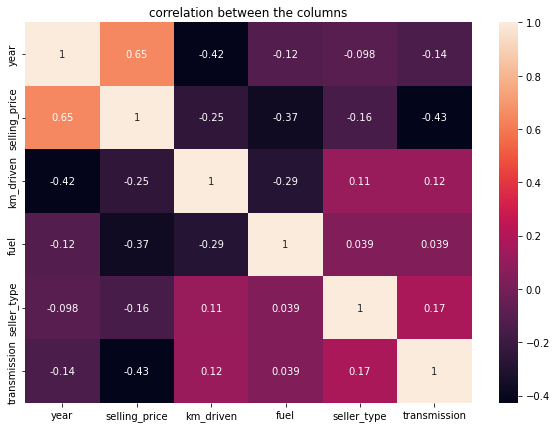

In [15]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)
plt.title("correlation between the columns")
plt

# Correlation using the regression plot

<AxesSubplot:title={'center':'correlation between sellig price and km driven'}, xlabel='year', ylabel='selling_price'>

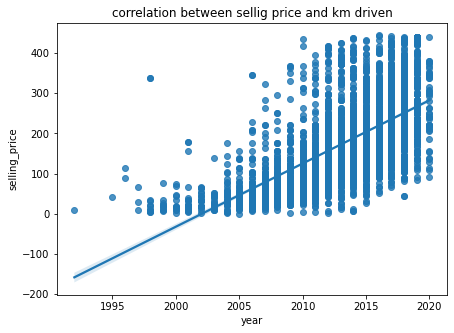

In [16]:
fig=plt.figure(figsize=(7,5))
plt.title("correlation between sellig price and km driven")
sns.regplot(x="year",y="selling_price",data=df)

# Training and Spliting the data

In [17]:
x=df.drop(["name","selling_price","owner"],axis=1)
y=df["selling_price"]

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [20]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(3472, 5)
(868, 5)
(3472,)
(868,)


In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler=StandardScaler()

In [23]:
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)

# Fitting the LinearRegression model

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
model=LinearRegression()

In [26]:
model.fit(xtrain,ytrain)

LinearRegression()

In [27]:
pred=model.predict(xtest)

# Using metrics to reduce error

In [28]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [29]:
from sklearn import metrics

In [30]:
print(metrics.mean_absolute_error(pred,ytest))
print(metrics.mean_squared_error(pred,ytest))
print(metrics.r2_score(pred,ytest))

48.82746204322943
3963.517062718655
0.3839034984055212


<AxesSubplot:ylabel='selling_price'>

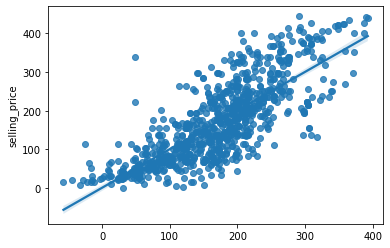

In [31]:
sns.regplot(x=pred,y=ytest)

# plot for the predicted data and the test output